In [1]:
library(ggplot2)
library(ggthemes)
# library(RColorBrewer)

In [2]:
myfile = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_logcounts_model_factors.csv"

In [3]:
df = read.csv(myfile, row.names = 1)
head(df,2)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
HPSI0714i-iudw_1--DA--d30--0,1.666456,0.5892917,-1.2180321,0.5332707,-0.1147184,-0.7004497,-0.8720116,-0.7222332,0.1454206,0.2551732,-0.1537032,0.04656182,0.9335609,-0.3033329,-1.420607,0.3760455,-1.3750346,-1.321022,0.03628515,-0.5237842
HPSI0714i-iudw_1--DA--d30--1,1.793275,-1.0897083,0.5161943,0.3031652,-0.3707059,-0.6362975,1.1359303,0.2466621,-0.3232387,-0.3289503,0.2974980,0.10648809,1.4348016,0.1735013,1.149061,-0.5206075,0.8877376,-0.130147,0.94184241,0.6611521


In [4]:
sce = readRDS("/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/DA_phenotype_wo_outliers2_sce.rds")
sce

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    

class: SingleCellExperiment 
dim: 32738 9219 
metadata(0):
assays(2): counts logcounts
rownames(32738): MIR1302.10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(9219): HPSI0714i-iudw_1--DA--d30--0
  HPSI0714i-iudw_1--DA--d30--1 ... HPSI0114i-rozh_4--DA--d52_tr--11
  HPSI0114i-rozh_4--DA--d52_tr--12
colData names(5): pseudocell celltype donor cluster condition
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [19]:
rownames(df) = colnames(sce)
head(df,2)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
HPSI0714i-iudw_1--DA--d30--0,1.666456,0.5892917,-1.2180321,0.5332707,-0.1147184,-0.7004497,-0.8720116,-0.7222332,0.1454206,0.2551732,-0.1537032,0.04656182,0.9335609,-0.3033329,-1.420607,0.3760455,-1.3750346,-1.321022,0.03628515,-0.5237842
HPSI0714i-iudw_1--DA--d30--1,1.793275,-1.0897083,0.5161943,0.3031652,-0.3707059,-0.6362975,1.1359303,0.2466621,-0.3232387,-0.3289503,0.2974980,0.10648809,1.4348016,0.1735013,1.149061,-0.5206075,0.8877376,-0.130147,0.94184241,0.6611521


In [6]:
colnames(df) = paste0("MOFA",1:20)

In [7]:
nrow(df)
ncol(df)

[1] 9219

[1] 20

In [8]:
head(df,2)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
HPSI0714i-iudw_1--DA--d30--0,1.666456,0.5892917,-1.2180321,0.5332707,-0.1147184,-0.7004497,-0.8720116,-0.7222332,0.1454206,0.2551732,-0.1537032,0.04656182,0.9335609,-0.3033329,-1.420607,0.3760455,-1.3750346,-1.321022,0.03628515,-0.5237842
HPSI0714i-iudw_1--DA--d30--1,1.793275,-1.0897083,0.5161943,0.3031652,-0.3707059,-0.6362975,1.1359303,0.2466621,-0.3232387,-0.3289503,0.2974980,0.10648809,1.4348016,0.1735013,1.149061,-0.5206075,0.8877376,-0.130147,0.94184241,0.6611521


In [10]:
# write.csv(df, myfile)

In [11]:
df$condition = c()

In [12]:
# write.csv(df, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/MOFA_20.csv")

In [13]:
### tSNE
set.seed(0)
library(Rtsne)
tsne = Rtsne(df)

df_tsne = data.frame(tsne$Y)
colnames(df_tsne) = c("tSNE1","tSNE2")
df_tsne$condition = sce$condition

In [14]:
p = ggplot(df_tsne, aes(x = tSNE1, y = tSNE2, col = condition)) + geom_point(alpha = 0.1) + theme_bw()

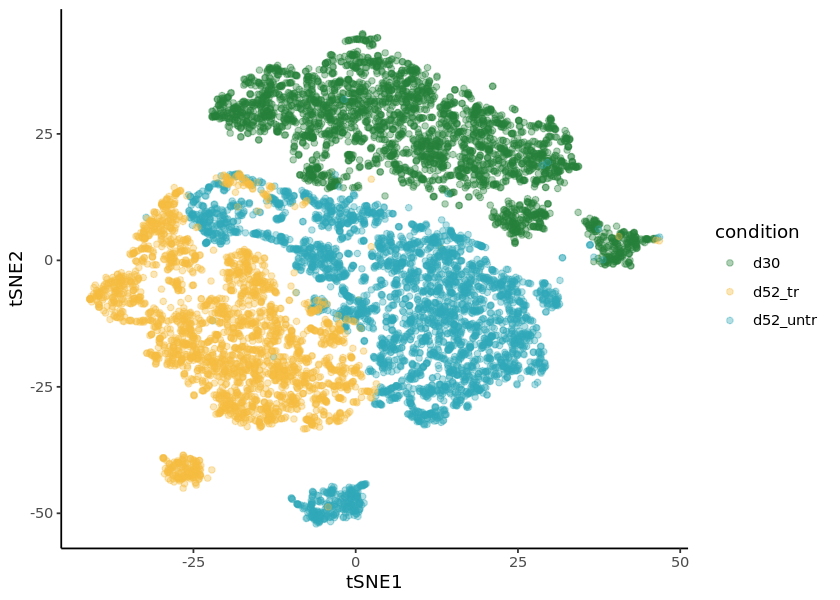

In [22]:
# change colours
# make theme_classic
options(repr.plot.width = 7, repr.plot.height = 5)
p + theme_classic() + scale_color_canva(palette = "Cheerful brights") + geom_point(alpha = 0.3)

In [16]:
rownames(df_tsne) = rownames(df)

In [17]:
head(df_tsne)

,tSNE1,tSNE2,condition
HPSI0714i-iudw_1--DA--d30--0,-13.7566906,32.71191,d30
HPSI0714i-iudw_1--DA--d30--1,4.6202919,31.43719,d30
HPSI0714i-iudw_1--DA--d30--2,-0.2728905,38.26676,d30
HPSI0714i-iudw_1--DA--d30--3,-8.2737582,33.39863,d30
HPSI0714i-iudw_1--DA--d30--4,29.7120934,20.15199,d30
HPSI0714i-iudw_1--DA--d30--5,18.9223039,16.77345,d30


In [18]:
# write.csv(df_tsne, "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_tsne.csv")